In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../python/')

# California dataset

The dataset is based on the [Distributed Solar PV Array Location and Extent Data Set for Remote Sensing Object Identification](https://energy.duke.edu/content/distributed-solar-pv-array-location-and-extent-data-set-remote-sensing-object-identification).

In [2]:
import random
import via as VIA

from dataset import VIADataset

via = VIA.load('../products/json/california.json')

dataset = VIADataset(via, '../resources/california/', shuffle=True)

print('Dataset size = {}'.format(len(dataset)))

Dataset size = 10816


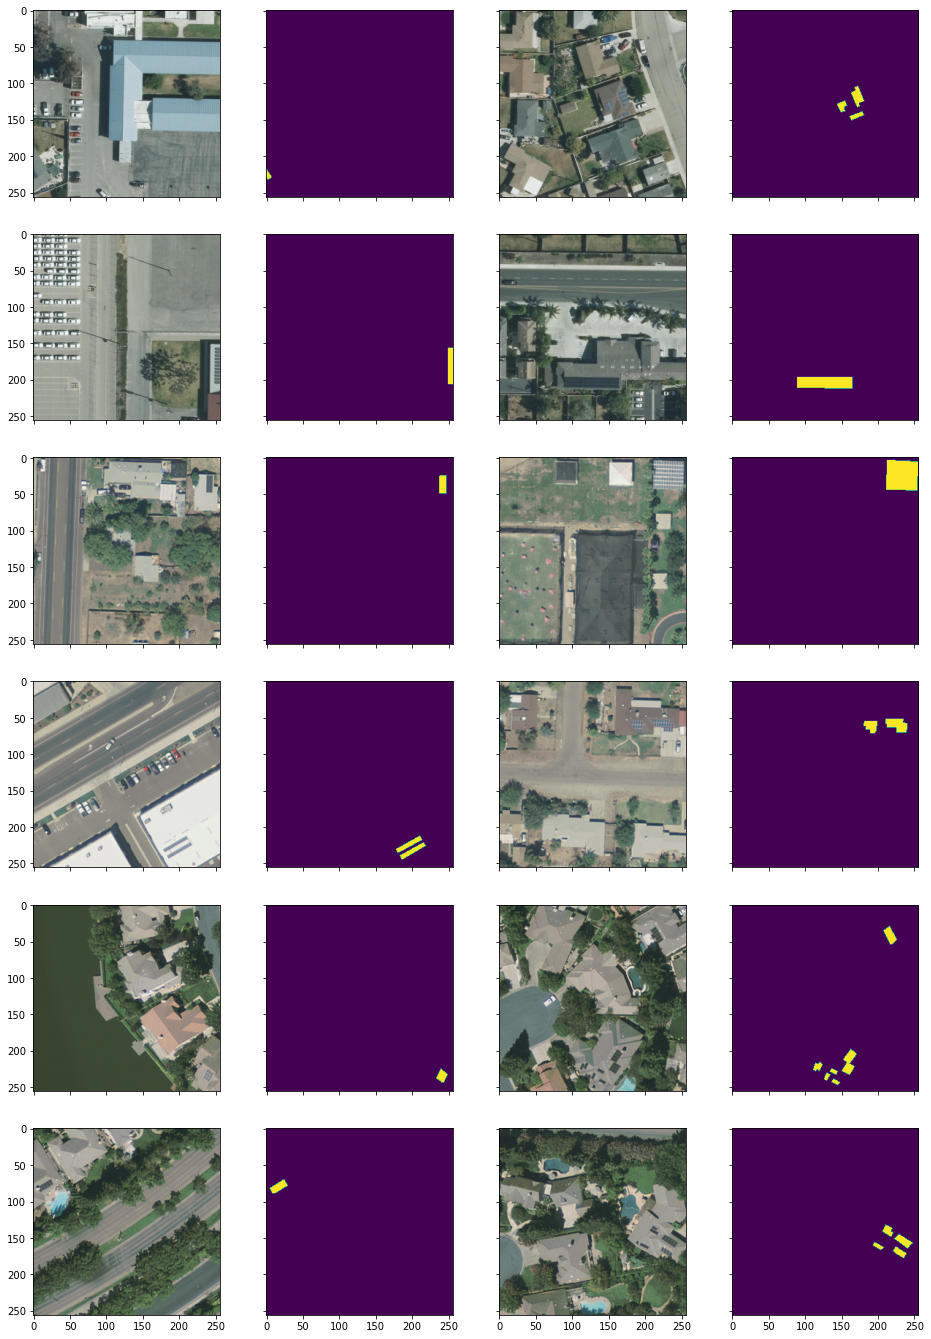

In [3]:
from plots import plot_images, flatten

images = []

for loader in [iter(dataset), iter(dataset), iter(dataset)]:
    for _ in range(4):
        images.append(next(loader))

plot_images(flatten(images), ncols=4)

## Data augmentation

Some extensive *data augmentation* was performed on this dataset, including 

* Rotations (90°, 180° or 270°)
* Flips (horizontal or vertical)
* Brightness alteration
* Saturation alteration
* Contrast alteration
* Blurring
* Smoothing
* Sharpening
* ...

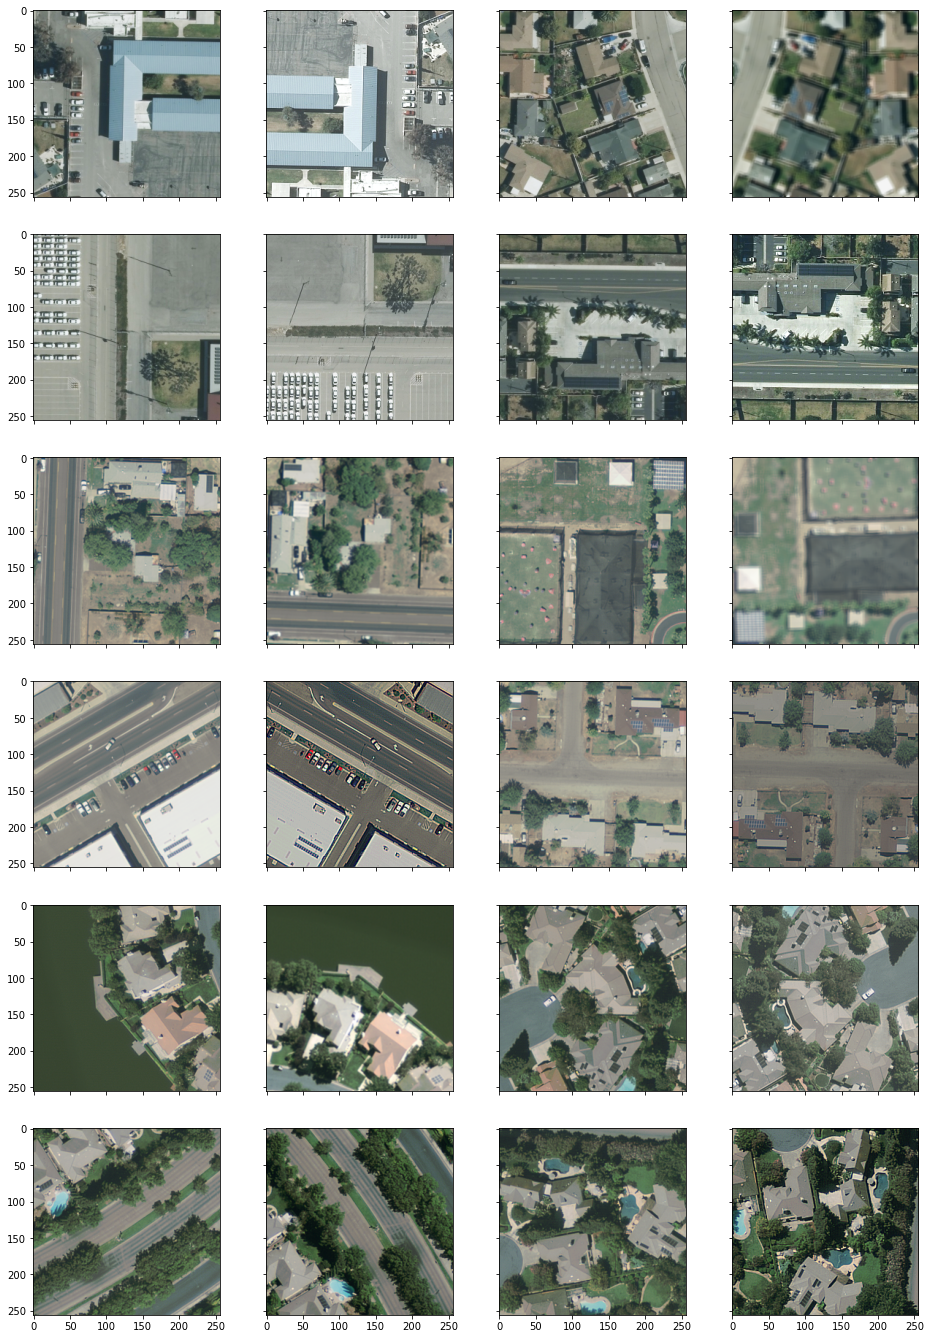

In [4]:
from dataset import ColorJitter, RandomFilter, RandomTranspose

augmented = RandomFilter(ColorJitter(RandomTranspose(images)))

plot_images(
    flatten([
        (images[i][0], x[0])
        for i, x in enumerate(augmented)
    ]),
    ncols=4
)